In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12196 entries, 0 to 12195
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_names  12196 non-null  object
 1   class        12196 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 190.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_names  5227 non-null   object
dtypes: object(1)
memory usage: 41.0+ KB


In [6]:
train.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [7]:
train['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [8]:
X = []
for image_name in train['image_names']:
    img = plt.imread('images/' + image_name)
    X.append(img)
X = np.array(X)

In [9]:
X.shape

(12196, 224, 224, 3)

In [10]:
y = train['class']

In [11]:
y.shape

(12196,)

In [12]:
rng = np.random.default_rng()

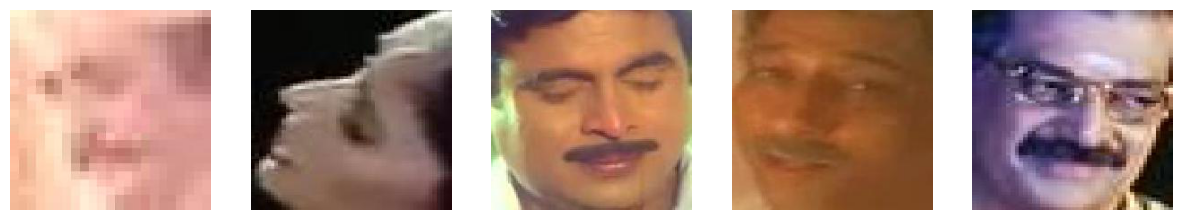

In [13]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(15,20))
for i in range(5):
    ax[i].imshow(X[rng.integers(X.shape[0])])
    ax[i].axis('off')

# Processing

In [14]:
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])

In [15]:
X.shape

(12196, 150528)

In [16]:
X.min(), X.max()

(0, 255)

In [16]:
X = X / X.max()

In [18]:
X.min(), X.max()

(0.0, 1.0)

In [17]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, det_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, DetCurveDisplay, RocCurveDisplay, PrecisionRecallDisplay

In [41]:
int(X.shape[0] * .7)

8537

In [18]:
X_df = pd.DataFrame(X)

In [21]:
train_index = rng.integers(0, X.shape[0], size=8537)

In [23]:
X_df.loc[train_index]

KeyError: "None of [Int64Index([-11873,  -3402, -10784,  -9793,  -7079, -11589, -10802, -10753,\n             -2263,  -3557,\n            ...\n             -7595,  -5213,  -8487,  -1941,  -5881,  -1213, -11158,  -3509,\n             -9637,  -7985],\n           dtype='int64', length=8537)] are in the [index]"

In [19]:
rng.shuffle(X_df)

/tmp/ipykernel_5707/399626668.py:1: UserWarning: you are shuffling a 'DataFrame' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  rng.shuffle(X_df)


KeyboardInterrupt: 

In [20]:
X_train, X_test = X[:8537], X[8537:]

In [21]:
y_train, y_test = train['class'][:8537], train['class'][8537:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X[:5000], y[:5000], test_size=0.3, random_state = 42)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state = 42)

In [29]:
X_train.shape, X_test.shape

((8537, 150528), (3659, 150528))

# Model

In [18]:
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, concatenate

2023-01-07 01:27:05.462520: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
model=Sequential()
model.add(Dense(units=100, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(units=1, activation='sigmoid'))

2023-01-07 01:27:10.711356: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 01:27:10.842069: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 60211200 exceeds 10% of free system memory.
2023-01-07 01:27:10.946162: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 60211200 exceeds 10% of free system memory.
2023-01-07 01:27:11.030300: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 60211200 exceeds 10% of free system memory.


In [20]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer=keras.optimizers.Adam(), 
              loss=keras.losses.BinaryCrossentropy(), 
              metrics=[keras.metrics.BinaryAccuracy()])

In [34]:
history = model.fit(X_train, y_train, batch_size=1024, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
9/9 [==============================] - 55s 6s/step - loss: 22.5994 - binary_accuracy: 0.4975 - val_loss: 1.1772 - val_binary_accuracy: 0.4933
Epoch 2/50
9/9 [==============================] - 10s 1s/step - loss: 0.8460 - binary_accuracy: 0.5175 - val_loss: 0.6932 - val_binary_accuracy: 0.4930
Epoch 3/50
9/9 [==============================] - 8s 942ms/step - loss: 0.6931 - binary_accuracy: 0.5119 - val_loss: 0.6932 - val_binary_accuracy: 0.4930
Epoch 4/50
9/9 [==============================] - 5s 606ms/step - loss: 0.6931 - binary_accuracy: 0.5119 - val_loss: 0.6932 - val_binary_accuracy: 0.4930
Epoch 5/50
9/9 [==============================] - 6s 627ms/step - loss: 0.6931 - binary_accuracy: 0.5119 - val_loss: 0.6932 - val_binary_accuracy: 0.4930
Epoch 6/50
7/9 [======================>.......] - ETA: 1s - loss: 0.6930 - binary_accuracy: 0.5172

KeyboardInterrupt: 

In [22]:
history = model.fit(X, y, batch_size=1024, epochs=50, verbose=1)

2023-01-07 01:29:42.046324: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 7343357952 exceeds 10% of free system memory.


Epoch 1/50


2023-01-07 01:30:55.625528: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 60211200 exceeds 10% of free system memory.


12/12 [==============================] - 22s 600ms/step - loss: 24.8745 - binary_accuracy: 0.5375
Epoch 2/50
12/12 [==============================] - 7s 618ms/step - loss: 8.6882 - binary_accuracy: 0.5634
Epoch 3/50
12/12 [==============================] - 6s 520ms/step - loss: 3.7800 - binary_accuracy: 0.6414
Epoch 4/50
12/12 [==============================] - 6s 517ms/step - loss: 2.1687 - binary_accuracy: 0.6916
Epoch 5/50
12/12 [==============================] - 7s 545ms/step - loss: 1.4954 - binary_accuracy: 0.7034
Epoch 6/50
12/12 [==============================] - 7s 589ms/step - loss: 1.1795 - binary_accuracy: 0.7129
Epoch 7/50
12/12 [==============================] - 7s 537ms/step - loss: 0.9275 - binary_accuracy: 0.7274
Epoch 8/50
12/12 [==============================] - 6s 527ms/step - loss: 0.8331 - binary_accuracy: 0.7341
Epoch 9/50
12/12 [==============================] - 6s 530ms/step - loss: 1.2959 - binary_accuracy: 0.6736
Epoch 10/50
12/12 [===========================

In [27]:
prediction = model.predict(X_test)

115/115 [==============================] - 2s 12ms/step


In [23]:
prediction = model.predict(X)

382/382 [==============================] - 8s 15ms/step


In [24]:
prediction_cat = (prediction >= 0.5).astype(int)

In [26]:
print(classification_report(train['class'], prediction_cat))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      6022
           1       0.83      0.78      0.80      6174

    accuracy                           0.81     12196
   macro avg       0.81      0.81      0.81     12196
weighted avg       0.81      0.81      0.81     12196



In [29]:
history_df = pd.DataFrame(history.history)

In [30]:
history_df.head()

,loss,binary_accuracy
0,3.575454,0.627419
1,0.640455,0.736307
2,0.525556,0.753034
3,0.840298,0.705887
4,0.619278,0.738931


Text(0.5, 0.01, 'epochs')

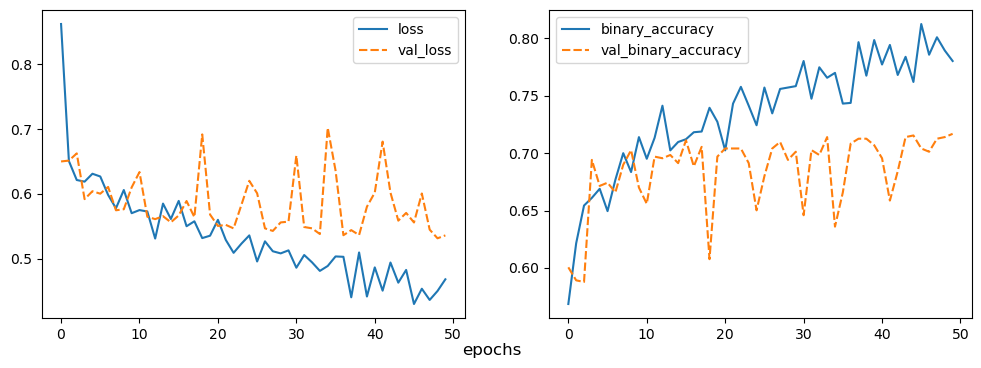

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.lineplot(history_df[['loss', 'val_loss']], ax=ax1)
sns.lineplot(history_df[['binary_accuracy', 'val_binary_accuracy']], ax=ax2)
fig.supxlabel('epochs')

Text(0.5, 0.01, 'epochs')

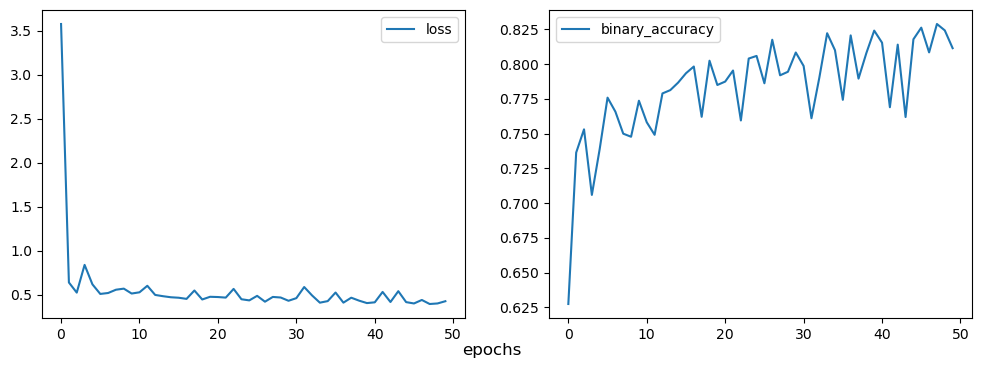

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.lineplot(history_df[['loss']], ax=ax1)
sns.lineplot(history_df[['binary_accuracy']], ax=ax2)
fig.supxlabel('epochs')

actual class 1, predicted probability 0.9768184423446655


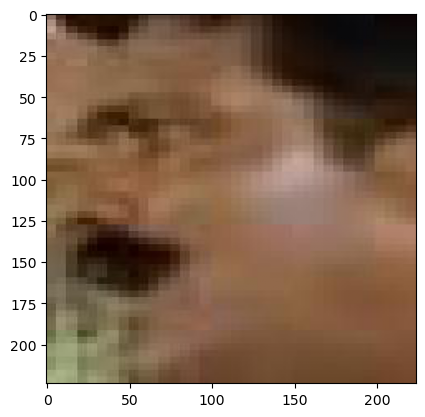

In [37]:
index = rng.integers(X.shape[0])
plt.imshow(np.reshape(X[index], (224,224,3)))
print(f'actual class {train["class"].loc[index]}, predicted probability {prediction[index][0]}')

# test

In [27]:
test_X = []
for image_name in test['image_names']:
    img = plt.imread('images/' + image_name)
    test_X.append(img)
test_X = np.array(test_X)

In [28]:
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1]*test_X.shape[2]*test_X.shape[3])

In [29]:
test_X.shape

(5227, 150528)

In [16]:
test_X.min(), test_X.max()

(0, 255)

In [30]:
test_X = test_X / test_X.max()

In [18]:
test_X.min(), test_X.max()

(0.0, 1.0)

In [31]:
test_pred = model.predict(test_X)

164/164 [==============================] - 5s 20ms/step


In [32]:
test_pred_cat = (test_pred >= 0.5).astype(int)

In [42]:
test['image_names']

0        5603.jpg
1        1286.jpg
2        9815.jpg
3        8865.jpg
4        9306.jpg
          ...    
5222    13040.jpg
5223     1335.jpg
5224    11246.jpg
5225     9052.jpg
5226     9574.jpg
Name: image_names, Length: 5227, dtype: object

In [44]:
result = pd.DataFrame({'image_names':test['image_names'], 'class': test_pred_cat.flatten()})

In [45]:
result.to_csv('submission.csv', index=False)